In [1]:
import os
import shutil

# Image Processing
This Notebook is used for filtering, splitting and tiling. A Notebook is used to help visualise as you are processing

In [2]:
from utils.folder_structurer import FolderStructurer
from utils.filterer import ImageFilterer
from utils.image_patcher import ImagePatcher
from utils.data_splitter import DatasetSplitter
from utils.balancer import DatasetBalancer

In [3]:
name = "amag3_test"

input_path = "/media/java/RRAP03/data/exported_from_cvat/test3"
output_path = "/media/java/RRAP03/data/outputs/data_pipleline"

In [4]:
# Clear any existing output data with the same name
do_it = True
if do_it:
    # Get all immediate subdirectories in the output_path
    if os.path.exists(output_path):
        for subdir in os.listdir(output_path):
            subdir_path = os.path.join(output_path, subdir)
            if os.path.isdir(subdir_path):
                # Check if this subdir contains a folder with the current dataset name
                target_dir = os.path.join(subdir_path, name)
                if os.path.exists(target_dir):
                    print(f"Removing existing directory: {target_dir}")
                    shutil.rmtree(target_dir, ignore_errors=True)
                    # Ensure directory structure is maintained
                    os.makedirs(os.path.dirname(target_dir), exist_ok=True)
    else:
        os.makedirs(output_path, exist_ok=True)

Removing existing directory: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled_balanced/amag3_test
Removing existing directory: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled/amag3_test
Removing existing directory: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split/amag3_test
Removing existing directory: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered/amag3_test
Removing existing directory: /media/java/RRAP03/data/outputs/data_pipleline/yolo/amag3_test


## Clear Output folder
This might be needed if running again.

## Folder Format
First we need to structure the format ready for training after we have exported the labelled images from cvat.

In [5]:
exported_to_yolo_path = f"{output_path}/yolo/{name}"
structurer = FolderStructurer(input_path, exported_to_yolo_path)

In [6]:
# structurer.visualize_input_structure()

In [7]:
# is_valid = structurer.validate_input()

In [8]:
structurer.convert()

Validating dataset: test3_cgras_2024_amag_T01
✓ test3_cgras_2024_amag_T01 structure is valid

Validation summary:
  - Valid datasets: 1
  - Invalid datasets: 0

Converting 1 datasets...


Processing dataset: test3_cgras_2024_amag_T01:   0%|          | 0/1 [00:00<?, ?dataset/s]

Collected classes from test3_cgras_2024_amag_T01: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


Processing dataset: test3_cgras_2024_amag_T01: 100%|██████████| 1/1 [00:00<00:00, 28.35dataset/s]

Dataset test3_cgras_2024_amag_T01: 3 images, 3 labels

Successfully created training structure at /media/java/RRAP03/data/outputs/data_pipleline/yolo/amag3_test
Created cgras_data.yaml with 4 classes and 1 datasets
Class mapping preserved: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


True

In [9]:
# structurer.visualize_output_structure()

## Filtering
First it is important to filter out any issues that still may be contained in the labels/ datasets.

In [10]:
yaml_path = structurer.yaml_path
filtered_path = f"{output_path}/yolo_filtered/{name}"

filterer = ImageFilterer(yaml_path, filtered_path)

Found 1 dataset paths in the YAML file


In [11]:
filterer.analyze_dataset_areas()

Analyzing 3 images in data...


Processing data: 100%|██████████| 3/3 [00:00<00:00,  7.47files/s]

Found 1683 labels in data
Total labels analyzed: 1683


[30862.44646359794,
 16404.03678362444,
 12802.083719000686,
 12762.319255881011,
 8516.758567105979,
 9088.076588138938,
 14691.363180398941,
 11992.938011541963,
 28741.11050760746,
 25914.932352989912,
 16527.73656636104,
 32764.75572964549,
 9459.885793313384,
 13718.631808653474,
 3916.0104318857193,
 2511.8695667386055,
 2324.0344136357307,
 2324.072947740555,
 2323.907860457897,
 2323.938101351261,
 2323.979384601116,
 2323.938101410866,
 2323.979384601116,
 2323.935397684574,
 2323.946348965168,
 2324.089465558529,
 1702.0836634635925,
 3692.127868503332,
 2170.088381022215,
 39093.79491198063,
 2169.898505628109,
 1271.9873705506325,
 1272.1249203681946,
 1272.0588945746422,
 1272.0588946342468,
 1839.847806662321,
 1420.0227299928665,
 2323.971137046814,
 2323.9739089608192,
 2323.918857216835,
 2324.094986498356,
 2323.938101351261,
 2323.979384601116,
 26940.69471746683,
 2324.0949865579605,
 2323.968387901783,
 2323.995879650116,
 2012.0046705007553,
 3071.9500907063484,
 

In [12]:
# filterer.plot_area_histogram()

Filtering to show only areas <= 1000 pixels² (51/1683 labels, 3.0%)


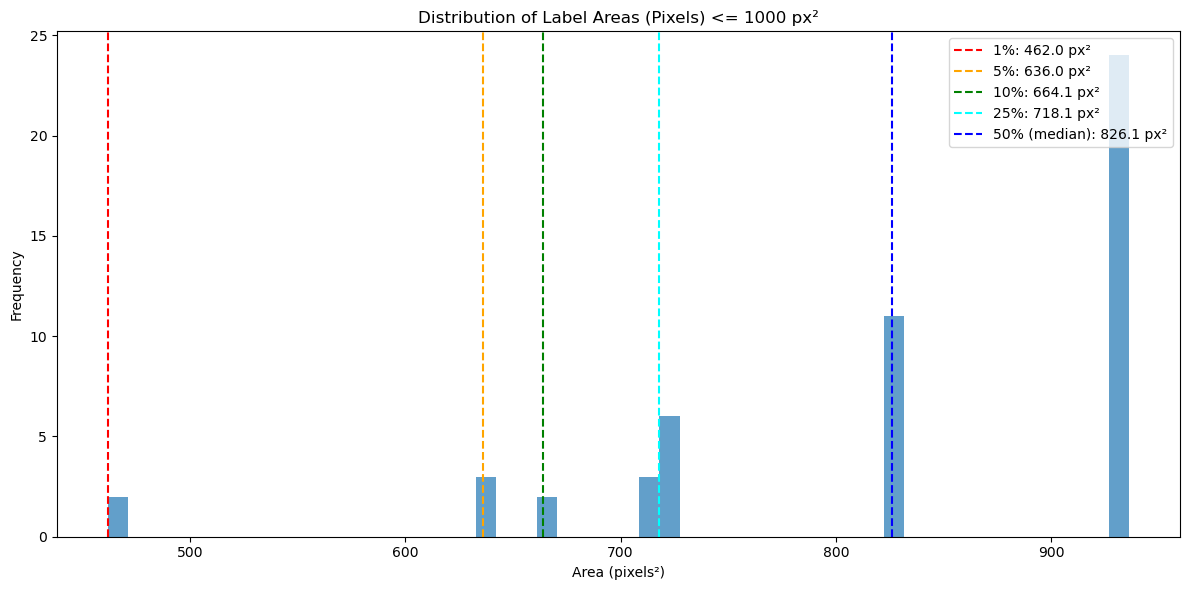

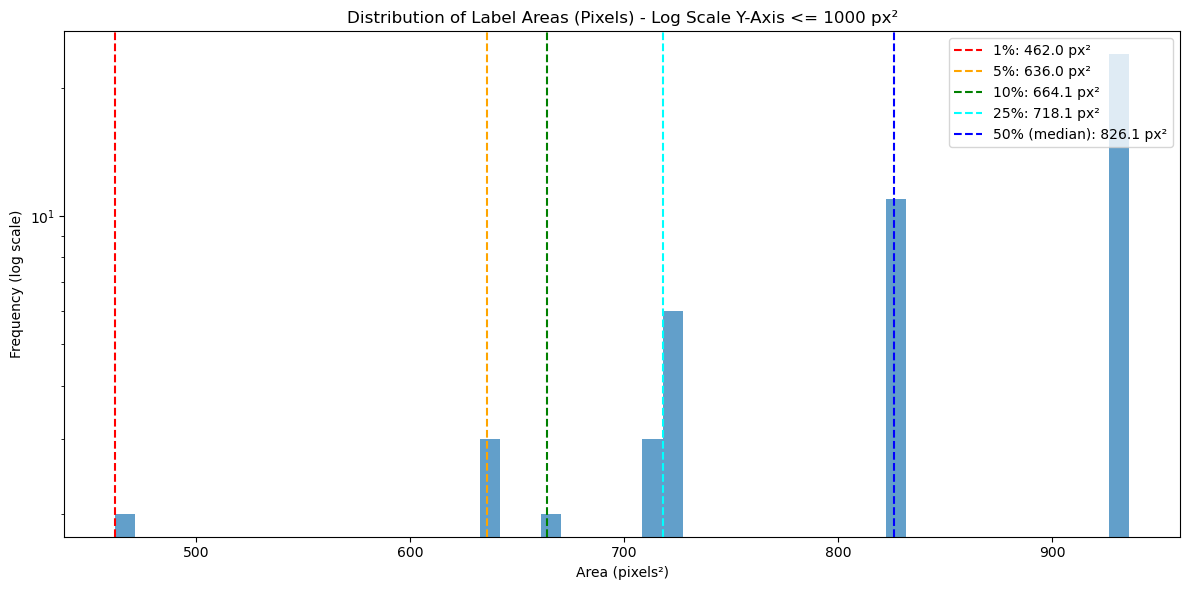

Label area statistics (in pixels²):
  - Count: 51
  - Min: 462.0
  - Max: 936.1
  - Mean: 827.0
  - Median: 826.1
  - 1%: 462.0
  - 5%: 636.0
  - 10%: 664.1
  - 25%: 718.1
  - 50% (median): 826.1


In [13]:
filterer.plot_area_histogram(max_area=1000)

In [14]:
# filterer.plot_area_histogram(class_ids=0, max_area=1000)

In [15]:
# filterer.plot_area_histogram(class_ids=1, max_area=1000)

In [16]:
# filterer.plot_area_histogram(class_ids=2, max_area=1000)

In [17]:
# filterer.plot_area_histogram(class_ids=3, max_area=1000)

In [18]:
# filterer.visualize_smallest_labels(n=1)

In [19]:
# filterer.find_label_by_area(200)

In this case, the decision was made to filter polups at 175 pixels and corals at 200 pixels

In [20]:
filterer.filter_small_labels(
    min_pixel_area=[175, 175, 200, 200], 
    class_ids=[0, 1, 2, 3]
)

Filtering with the following thresholds:
  - Class 0 (Class 0): 175 pixels²
  - Class 1 (Class 1): 175 pixels²
  - Class 2 (Class 2): 200 pixels²
  - Class 3 (Class 3): 200 pixels²
Filtering 3 images in data...


Filtering data: 100%|██████████| 3/3 [00:00<00:00,  8.09files/s]

Dataset data filtering complete:
  - Processed 3 images
  - Kept 1683 labels, removed 0 labels

Filtering complete:
  - Processed 3 images across 1 datasets
  - Kept 1683 labels, removed 0 labels

Per-class filtering statistics:
  - Class 0 (Class 0): threshold 175 pixels²
    - Processed: 1238
    - Kept: 1238
    - Removed: 0 (0.0%)
  - Class 2 (Class 2): threshold 200 pixels²
    - Processed: 445
    - Kept: 445
    - Removed: 0 (0.0%)

Filtered data saved to /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered/amag3_test


In [21]:
# filterer.visualize_smallest_labels(n=5, use_filtered=True)

In [22]:
# filterer.plot_area_histogram(max_area=1000, use_filtered=True)

# File Splitter
Split the data into train, val, test. This should have some options. It should be able to view the number of images per tile

In [23]:
yaml_path = filterer.new_yaml_path
split_path = f"{output_path}/yolo_filtered_split/{name}"

In [24]:
splitter = DatasetSplitter(yaml_path, split_path)

Found 1 dataset paths in the YAML file
Found 3 images and 3 label files


In [25]:
# splitter.visualize_distribution(fields=["tile"])

Parsing file information...


100%|██████████| 3/3 [00:00<00:00, 11960.94files/s]

Successfully parsed 3 files
No split_field provided. Previewing random image-level split.


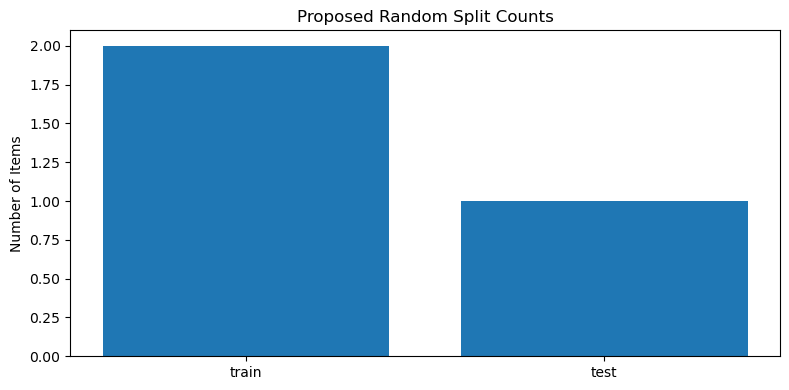

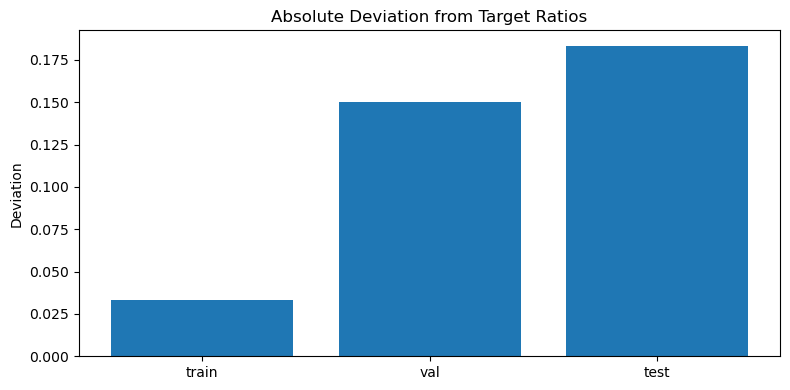

{0: 'train', 1: 'train', 2: 'test'}

In [26]:
splitter.preview_split(
    split_field=None,
    train_ratio=0.7, 
    val_ratio=0.15, 
    test_ratio=0.15,
    # stratify_by="week"
)

In [27]:
splitter.create_splits(split_field=None, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15) #, stratify_by="week"

No split_field provided. Performing random image-level split.

Final Random Split Counts:
  - Train: 2 (66.7%)
  - Validation: 0 (0.0%)
  - Test: 1 (33.3%)


The only reason I am not including the stratisfy by week is that it will limit the images used to ensure that the weeks match across the dataset. But this is less important compared to having more data.

In [28]:
splitter.export_splits()

Copying files: 100%|██████████| 3/3 [00:00<00:00, 86.57files/s]

Exported splits to /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split/amag3_test
Created YAML file at /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split/amag3_test/cgras_data.yaml

Export Summary:
  - Train: 2 images (66.7%)
  - Validation: 0 images (0.0%)
  - Test: 1 images (33.3%)


True

## Tiler
This next bit will tile the results.

In [29]:
yaml_path = splitter.new_yaml_path
tiled_path = f"{output_path}/yolo_filtered_split_tiled/{name}"

In [30]:
patcher = ImagePatcher(yaml_path, tiled_path)

Using 20 worker processes
Found 3 dataset paths in the YAML file
Found 2 images in dataset 'train_train'
Found 1 images in dataset 'test_test'


In [31]:
patcher.process_all_datasets()

Processing datasets:   0%|          | 0/2 [00:00<?, ?dataset/s]


Processing dataset 'train_train' (2 images) starting from image 0


                                                               
Processing datasets:   0%|          | 0/2 [00:08<?, ?dataset/s]

Image CGRAS_Amag_MIS5a_20241105_w1_T01_13.jpg: Success - Created 384 tiles


                                                               
Processing datasets:  50%|█████     | 1/2 [00:34<00:34, 34.06s/dataset]

Image CGRAS_Amag_MIS5a_20241112_w2_T01_06.jpg: Success - Created 384 tiles
Completed dataset 'train_train': processed 2 images, created 768 tiles

Processing dataset 'test_test' (1 images) starting from image 0


                                                                       
Processing datasets: 100%|██████████| 2/2 [00:56<00:00, 28.42s/dataset]

Image CGRAS_Amag_MIS5a_20241112_w2_T01_15.jpg: Success - Created 384 tiles
Completed dataset 'test_test': processed 1 images, created 384 tiles

DEBUG INFO:
Dataset paths: [('train/images', 'train_train'), ('valid/images', 'val_valid'), ('test/images', 'test_test')]
Directory counts: {'train_train': 0, 'val_valid': 0, 'test_test': 0}
Processed directories: ['test_test_0', 'train_train_0']

Generated tiled dataset YAML: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled/amag3_test/cgras_data.yaml
YAML contents:
train: ['train_train_0/images']
test: ['test_test_0/images']

Total processing time: 56.84 seconds
Processed 3 images across 2 datasets


## Balance the dataset

In [32]:
yaml_path = patcher.new_yaml_path
balance_path = f"{output_path}/yolo_filtered_split_tiled_balanced/{name}"

In [33]:
balancer = DatasetBalancer(yaml_path, balance_path)

Found 2 dataset paths in the YAML file


In [34]:
balancer.analyze_dataset_balance()

Analyzing dataset balance in train_train_0 (split: train)...


Analyzing train_train_0: 100%|██████████| 768/768 [00:00<00:00, 24788.76files/s]


  - Dataset: train_train_0 (split: train)
    - Total images: 768
    - Non-empty labels: 455 (59.2%)
    - Empty labels: 313 (40.8%)
    - Balanced sample size: 626
Analyzing dataset balance in test_test_0 (split: test)...


Analyzing test_test_0: 100%|██████████| 384/384 [00:00<00:00, 12795.03files/s]

  - Dataset: test_test_0 (split: test)
    - Total images: 384
    - Non-empty labels: 326 (84.9%)
    - Empty labels: 58 (15.1%)
    - Balanced sample size: 116

Summary by Split Type:
  - Split: train
    - Total images: 768
    - Non-empty labels: 455 (59.2%)
    - Empty labels: 313 (40.8%)
    - Balanced sample size: 626
  - Split: test
    - Total images: 384
    - Non-empty labels: 326 (84.9%)
    - Empty labels: 58 (15.1%)
    - Balanced sample size: 116

Overall Summary:
  - Total images: 1152
  - Non-empty labels: 781 (67.8%)
  - Empty labels: 371 (32.2%)
  - Total balanced sample size: 742


{'train_train_0': {'path': 'train_train_0/images',
  'split_type': 'train',
  'non_empty': 455,
  'empty': 313,
  'total': 768,
  'balanced_sample': 626},
 'test_test_0': {'path': 'test_test_0/images',
  'split_type': 'test',
  'non_empty': 326,
  'empty': 58,
  'total': 384,
  'balanced_sample': 116},
 '__overall__': {'non_empty': 781,
  'empty': 371,
  'total': 1152,
  'balanced_sample': 742}}

In [35]:
# balancer.plot_dataset_balance()

In [36]:
balanced_stats = balancer.balance_datasets()


Balancing split: train
Categorizing images for dataset: train_train_0...


Categorizing: 100%|██████████| 768/768 [00:00<00:00, 25899.72files/s]


Split train has 455 non-empty and 313 empty labels
Copying 626 files to balanced dataset...


Copying: 100%|██████████| 626/626 [00:00<00:00, 1768.26files/s]


Split train balanced:
  - Original: 455 non-empty, 313 empty (768 total)
  - Balanced: 313 non-empty, 313 empty (626 total)
  - Files copied: 626

Balancing split: test
Categorizing images for dataset: test_test_0...


Categorizing: 100%|██████████| 384/384 [00:00<00:00, 26871.76files/s]


Split test has 326 non-empty and 58 empty labels
Copying 116 files to balanced dataset...


Copying: 100%|██████████| 116/116 [00:00<00:00, 1696.41files/s]

Split test balanced:
  - Original: 326 non-empty, 58 empty (384 total)
  - Balanced: 58 non-empty, 58 empty (116 total)
  - Files copied: 116

Balancing complete:
  - Original dataset total: 1152 images
  - Balanced dataset total: 742 images
  - Files successfully copied: 742
  - Balanced dataset saved to: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled_balanced/amag3_test
  - YAML file saved to: /media/java/RRAP03/data/outputs/data_pipleline/yolo_filtered_split_tiled_balanced/amag3_test/cgras_data.yaml


## Filter again. Check

In [37]:
yaml_path = patcher.new_yaml_path
filtered_path = f"{output_path}/yolo_filtered_split_tiled_balanced_filtered/{name}"

filterer = ImageFilterer(yaml_path, filtered_path)

Found 2 dataset paths in the YAML file


In [38]:
filterer.analyze_dataset_areas()

Analyzing 768 images in train_train_0...


Processing train_train_0: 100%|██████████| 768/768 [00:01<00:00, 407.57files/s]


Found 3313 labels in train_train_0
Analyzing 384 images in test_test_0...


Processing test_test_0: 100%|██████████| 384/384 [00:01<00:00, 269.94files/s]

Found 2554 labels in test_test_0
Total labels analyzed: 5867


[11488.5,
 3952.0,
 968.0,
 1840.0,
 1840.0,
 1840.0,
 1840.0,
 13507.0,
 1840.0,
 1840.0,
 1840.0,
 1840.0,
 1438.0,
 1634.0,
 1840.0,
 13469.333333333023,
 17947.875,
 15127.0,
 2324.0,
 2324.0,
 2324.0,
 2268.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 1840.0,
 1840.0,
 1438.0,
 1840.0,
 1840.0,
 1840.0,
 22819.5,
 15127.0,
 52576.16666666651,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 54758.0,
 17632.205882352937,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 8179.5,
 13796.0,
 19263.0,
 21582.5,
 1936.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 2324.0,
 1324.0,
 1162.0,
 1162.0,
 1162.0,
 1162.0,
 1162.0,
 5347.299999999814,
 13796.0,
 19263.0,
 29097.5,
 1420.0,
 1162.0,
 1200.0,
 1162.0,
 1162.0,
 1162.0,
 1162.0,
 1162.0,
 807.666666666657,
 1420.0,
 1420.0,
 28882.25,
 28318.59285714291,
 1420.0,
 1162.0,
 1200.0,
 1162.0,
 1162.0,
 1162.0,
 1420.0,
 1420.0,
 1420.0,
 41877.6999999992

Filtering to show only areas <= 1000 pixels² (216/5867 labels, 3.7%)


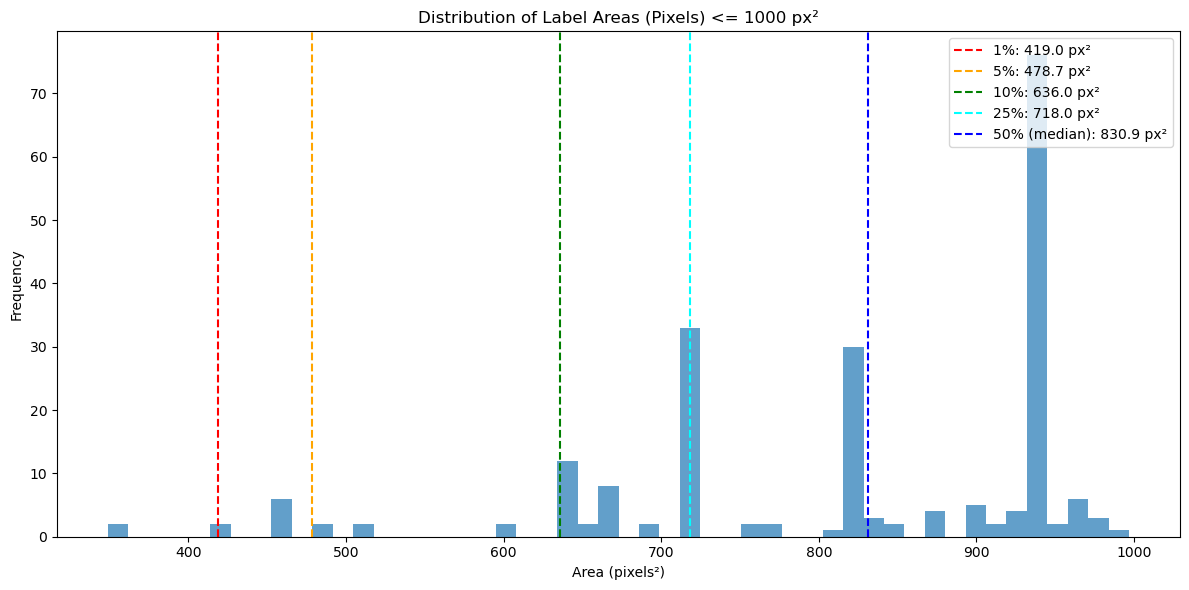

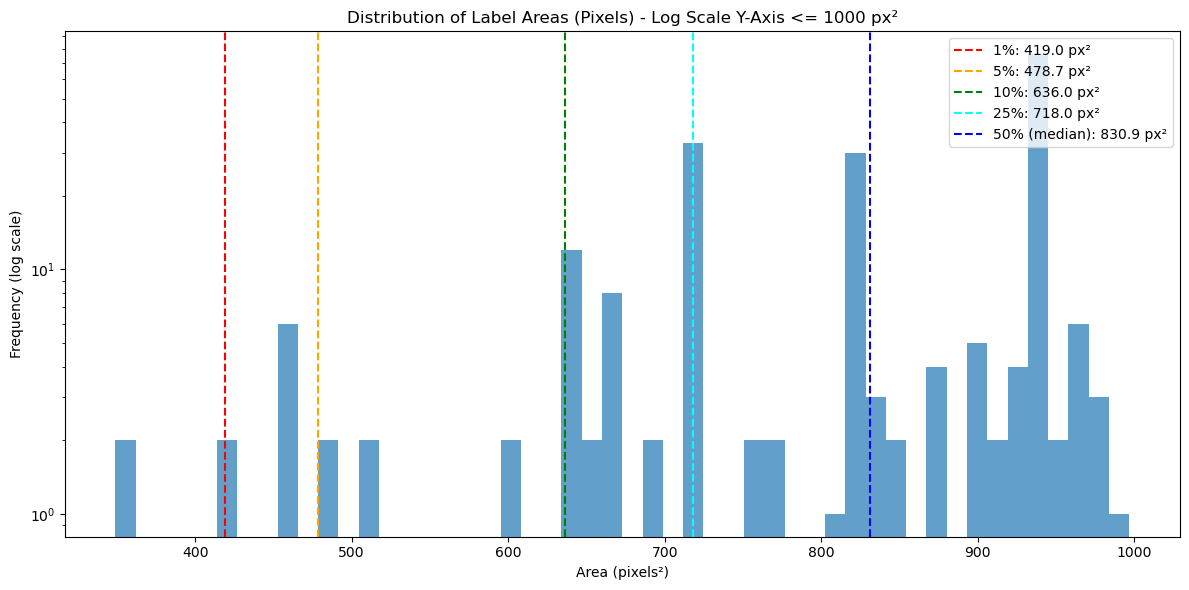

Label area statistics (in pixels²):
  - Count: 216
  - Min: 349.0
  - Max: 996.8
  - Mean: 814.4
  - Median: 830.9
  - 1%: 419.0
  - 5%: 478.7
  - 10%: 636.0
  - 25%: 718.0
  - 50% (median): 830.9


In [39]:
filterer.plot_area_histogram(max_area=1000)